# The Full Pipeline

**Inputs**: 
- config file
- image files
- well mask file

**Outputs**:
- droplets DataFrame (csv) 
- wells DataFrame (csv)
- condensed DataFrame (csv)
- jupyter notebook pre-loaded with basic quality control plots

We have built all the necessary parts in other python notebooks and moved code to kchip_v0 package. Now, implement each step. 

#### Step 1: Create droplets DataFrame
The droplets dataFrame contains information of all droplets in the pre-merge image set. We need to compute and store:
- the RGB information of each droplet
- the cluster and cluster label of each droplet
- the location of each droplet
- the well ID of each droplet

All of these steps can be found in the "Putting it together" notebook. 

#### Step 2: Create wells DataFrame
- Loop through post-merge images and identify wells
- Map post-merge wells to pre-merge wells
- Condense outputs to final dataframe

All of these steps can be found in the "Registration" notebook and Final Outputs. 


### Step 0: Imports and config

In [1]:
# basic imports 
import yaml
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# kchip imports
import kchip_v0.io as kchip_io
import kchip_v0.analyze as kchip_analyze

# Other
%matplotlib inline

# Read in config file
with open('kchip_config.yml', 'r') as ymlfile:
    config = yaml.load(ymlfile)
    
print yaml.dump(config)

barcodes:
  cluster:
    eps: 0.025
    min_samples: 6
    offset: [1200, 600, 600]
    points_to_cluster: 2000
  path: Notes.xlsx
image:
  base_path: Demo Data Set/Chip1
  bugs: 0
  dyes: [1, 2, 3]
  names: {premerge: Chip1_premerge, t0: Chip1_t0}
  overlap: 0.05
  pixel_size: 6.5
  size: 1024
  well_start_image: [1, 2]
  well_start_xy: [540, 140]
well_mask:
  filename: kchip_v0/well_mask.tif
  pixel_size: 8.33625
  well_start_xy: [850, 522]



### Step 1: Create droplets DataFrame
- Initialize from images
- Identify droplets in the same well from fit to masks
- Cluster
- Map apriori labels to clusters

Creating droplets from: 10,1
Creating droplets from: 10,2
Creating droplets from: 10,3
Creating droplets from: 10,4
Creating droplets from: 10,5
Creating droplets from: 10,6
Creating droplets from: 10,7
Creating droplets from: 1,1
Creating droplets from: 1,2
Creating droplets from: 1,3
Creating droplets from: 1,4
Creating droplets from: 1,5
Creating droplets from: 1,6
Creating droplets from: 1,7
Creating droplets from: 2,1
Creating droplets from: 2,2
Creating droplets from: 2,3
Creating droplets from: 2,4
Creating droplets from: 2,5
Creating droplets from: 2,6
Creating droplets from: 2,7
Creating droplets from: 3,1
Creating droplets from: 3,2
Creating droplets from: 3,3
Creating droplets from: 3,4
Creating droplets from: 3,5
Creating droplets from: 3,6
Creating droplets from: 3,7
Creating droplets from: 4,1
Creating droplets from: 4,2
Creating droplets from: 4,3
Creating droplets from: 4,4
Creating droplets from: 4,5
Creating droplets from: 4,6
Creating droplets from: 4,7
Creating drop

/Users/akulesa/anaconda/lib/python2.7/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Fitting droplets to well mask in: 10 1
Fitting droplets to well mask in: 10 2


kchip_v0/analyze.py:156: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  mask = well_mask[mask_xy(x,y,50)]
kchip_v0/matchmask.py:166: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  emask[:np.percentile(xy[:,1],1),:]=1
kchip_v0/matchmask.py:167: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  emask[np.percentile(xy[:,1],99):,:]=1
kchip_v0/matchmask.py:168: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  emask[:,:np.percentile(xy[:,0],1)]=1
kchip_v0/matchmask.py:169: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  emask[:,np.percentile(xy[:,1],99):]=1


Fitting droplets to well mask in: 10 3
Fitting droplets to well mask in: 10 4
Fitting droplets to well mask in: 10 5
Fitting droplets to well mask in: 10 6
Fitting droplets to well mask in: 10 7
Fitting droplets to well mask in: 1 1
Fitting droplets to well mask in: 1 2
Fitting droplets to well mask in: 1 3
Fitting droplets to well mask in: 1 4
Fitting droplets to well mask in: 1 5
Fitting droplets to well mask in: 1 6
Fitting droplets to well mask in: 1 7
Fitting droplets to well mask in: 2 1
Fitting droplets to well mask in: 2 2
Fitting droplets to well mask in: 2 3
Fitting droplets to well mask in: 2 4
Fitting droplets to well mask in: 2 5
Fitting droplets to well mask in: 2 6
Fitting droplets to well mask in: 2 7
Fitting droplets to well mask in: 3 1
Fitting droplets to well mask in: 3 2
Fitting droplets to well mask in: 3 3
Fitting droplets to well mask in: 3 4
Fitting droplets to well mask in: 3 5
Fitting droplets to well mask in: 3 6
Fitting droplets to well mask in: 3 7
Fitting

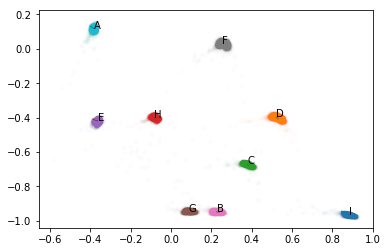

In [2]:
# Initialize droplets DataFrame from images
droplets, rotation_theta = kchip_analyze.initialize_droplets(config)

print 'Rotation (degrees): ', rotation_theta*180/np.pi

# Identify droplets in the same well from fit to masks
droplets = kchip_analyze.fit_droplets_to_mask(config,droplets,rotation_theta)

# Cluster droplets and map apriori labels to clusters
droplets = kchip_analyze.identify_clusters(config,droplets,show=1)

print 'Total droplets identified: ', droplets.shape[0]

### Step 2: Create wells DataFrame
- Create pre-merge wells dataFrame
- Loop through post-merge images and identify wells
- Map post-merge wells to pre-merge wells

In [3]:
# Identify premerge wells
pre_wells = droplets.groupby(['IndexX','IndexY','Well_ID'],as_index=False)[['ImageX','ImageY','Edge']].mean()

# Identify postmerge wells and map to pre-merge wells
pre_post = kchip_analyze.map_pre_to_post(config,'t0',pre_wells)

# Condense output
condensed = kchip_analyze.condense_output(droplets,pre_post)

Now analyzing: 10,1
Now analyzing: 10,2
Now analyzing: 10,3
Now analyzing: 10,4
Now analyzing: 10,5
Now analyzing: 10,6
Now analyzing: 10,7
Now analyzing: 1,1
Now analyzing: 1,2
Now analyzing: 1,3
Now analyzing: 1,4
Now analyzing: 1,5
Now analyzing: 1,6
Now analyzing: 1,7
Now analyzing: 2,1
Now analyzing: 2,2
Now analyzing: 2,3
Now analyzing: 2,4
Now analyzing: 2,5
Now analyzing: 2,6
Now analyzing: 2,7
Now analyzing: 3,1
Now analyzing: 3,2
Now analyzing: 3,3
Now analyzing: 3,4
Now analyzing: 3,5
Now analyzing: 3,6
Now analyzing: 3,7
Now analyzing: 4,1
Now analyzing: 4,2
Now analyzing: 4,3
Now analyzing: 4,4
Now analyzing: 4,5
Now analyzing: 4,6
Now analyzing: 4,7
Now analyzing: 5,1
Now analyzing: 5,2
Now analyzing: 5,3
Now analyzing: 5,4
Now analyzing: 5,5
Now analyzing: 5,6
Now analyzing: 5,7
Now analyzing: 6,1
Now analyzing: 6,2
Now analyzing: 6,3
Now analyzing: 6,4
Now analyzing: 6,5
Now analyzing: 6,6
Now analyzing: 6,7
Now analyzing: 7,1
Now analyzing: 7,2
Now analyzing: 7,3
Now a

In [4]:
# Save outputs
droplets.to_csv('droplets.csv')
pre_post.to_csv('pre_post_merge.csv')
condensed.to_csv('output.csv')

## Quality control outputs

### Locations of wells detected

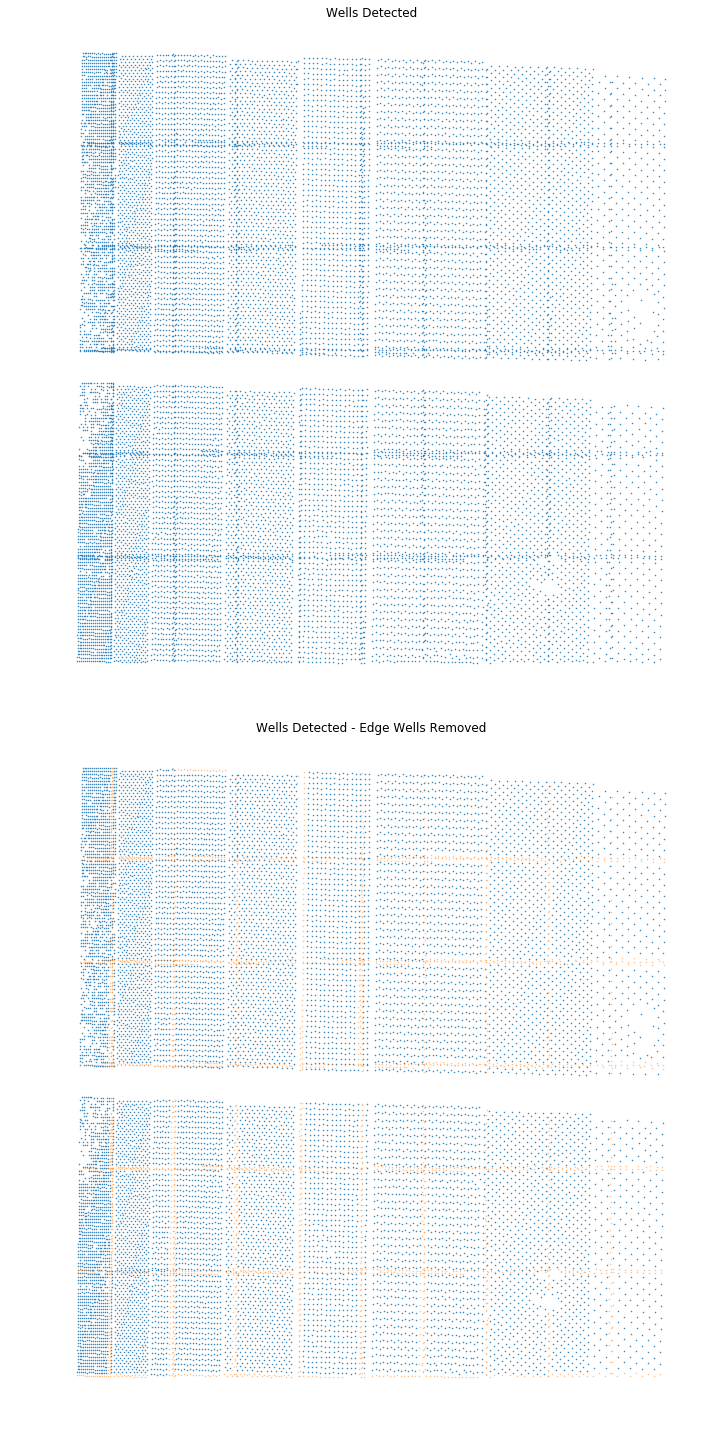

In [5]:
fig, axes = plt.subplots(2,1,figsize=(10,20))

axes[0].plot(pre_post['Pre_GlobalX'],-pre_post['Pre_GlobalY'],'.',ms=1)
axes[0].set_title('Wells Detected')
axes[0].set_axis_off()

axes[1].plot(pre_post[pre_post['Pre_Edge']==False]['Pre_GlobalX'],-pre_post[pre_post['Pre_Edge']==False]['Pre_GlobalY'],'.',ms=1)
axes[1].plot(pre_post[pre_post['Pre_Edge']==True]['Pre_GlobalX'],-pre_post[pre_post['Pre_Edge']==True]['Pre_GlobalY'],'.',ms=1,alpha=0.5)
axes[1].set_title('Wells Detected - Edge Wells Removed')
axes[1].set_axis_off()

plt.tight_layout()

### Counts of different cluster labels

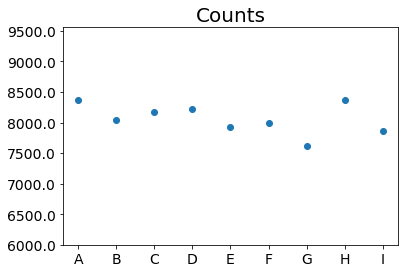

In [6]:
rmv = ['Area','Intensity','Hash','Total']
labels = [a for a in condensed.columns if a not in rmv]

counts = condensed.sum()[labels]

fig, axes = plt.subplots()

axes.plot(counts.values,'o')
axes.set_xticks(range(len(labels)))
axes.set_xticklabels(labels,size=14)
g  = axes.get_yticks()
axes.set_yticklabels(g,size=14)
axes.set_ylim([0, 1.5*max(counts)])
axes.set_title('Counts',size=20)

### Histogram of growth and values

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11ea177d0>], dtype=object)

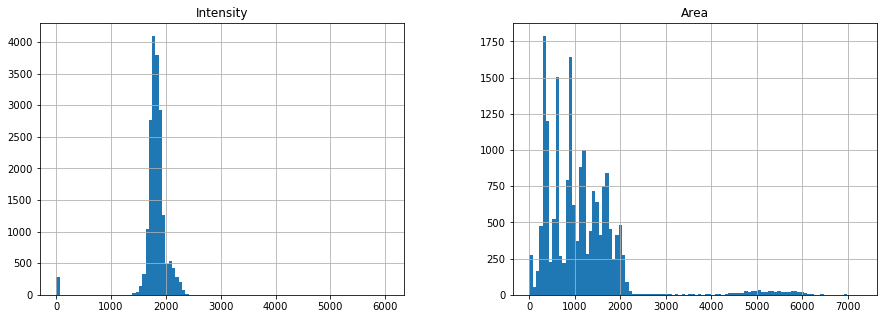

In [7]:
fig, axes = plt.subplots(1,2,figsize=(15,5))

condensed.hist('Intensity',ax=axes[0],bins=100)
condensed.hist('Area',ax=axes[1],bins=100)